## Artifical Neural Network Using Pytorch
- Predict whether the pationt has a Diabetic or Not
- Here 1= Diabetes, 0= Not Diabetes

In [130]:
#Lets import the libraries -
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch

In [131]:
#Lets load the dataset -
df=pd.read_csv('C:/Users/om/Desktop/PyTorch/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [132]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [133]:
#Lets plot the Pairplot, but for that we need to convert numerical veriable to categorical one -
df['Outcome'] = np.where(df['Outcome'] == 1, 'Dibetes', 'No Dibetes')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Dibetes
1,1,85,66,29,0,26.6,0.351,31,No Dibetes
2,8,183,64,0,0,23.3,0.672,32,Dibetes
3,1,89,66,23,94,28.1,0.167,21,No Dibetes
4,0,137,40,35,168,43.1,2.288,33,Dibetes


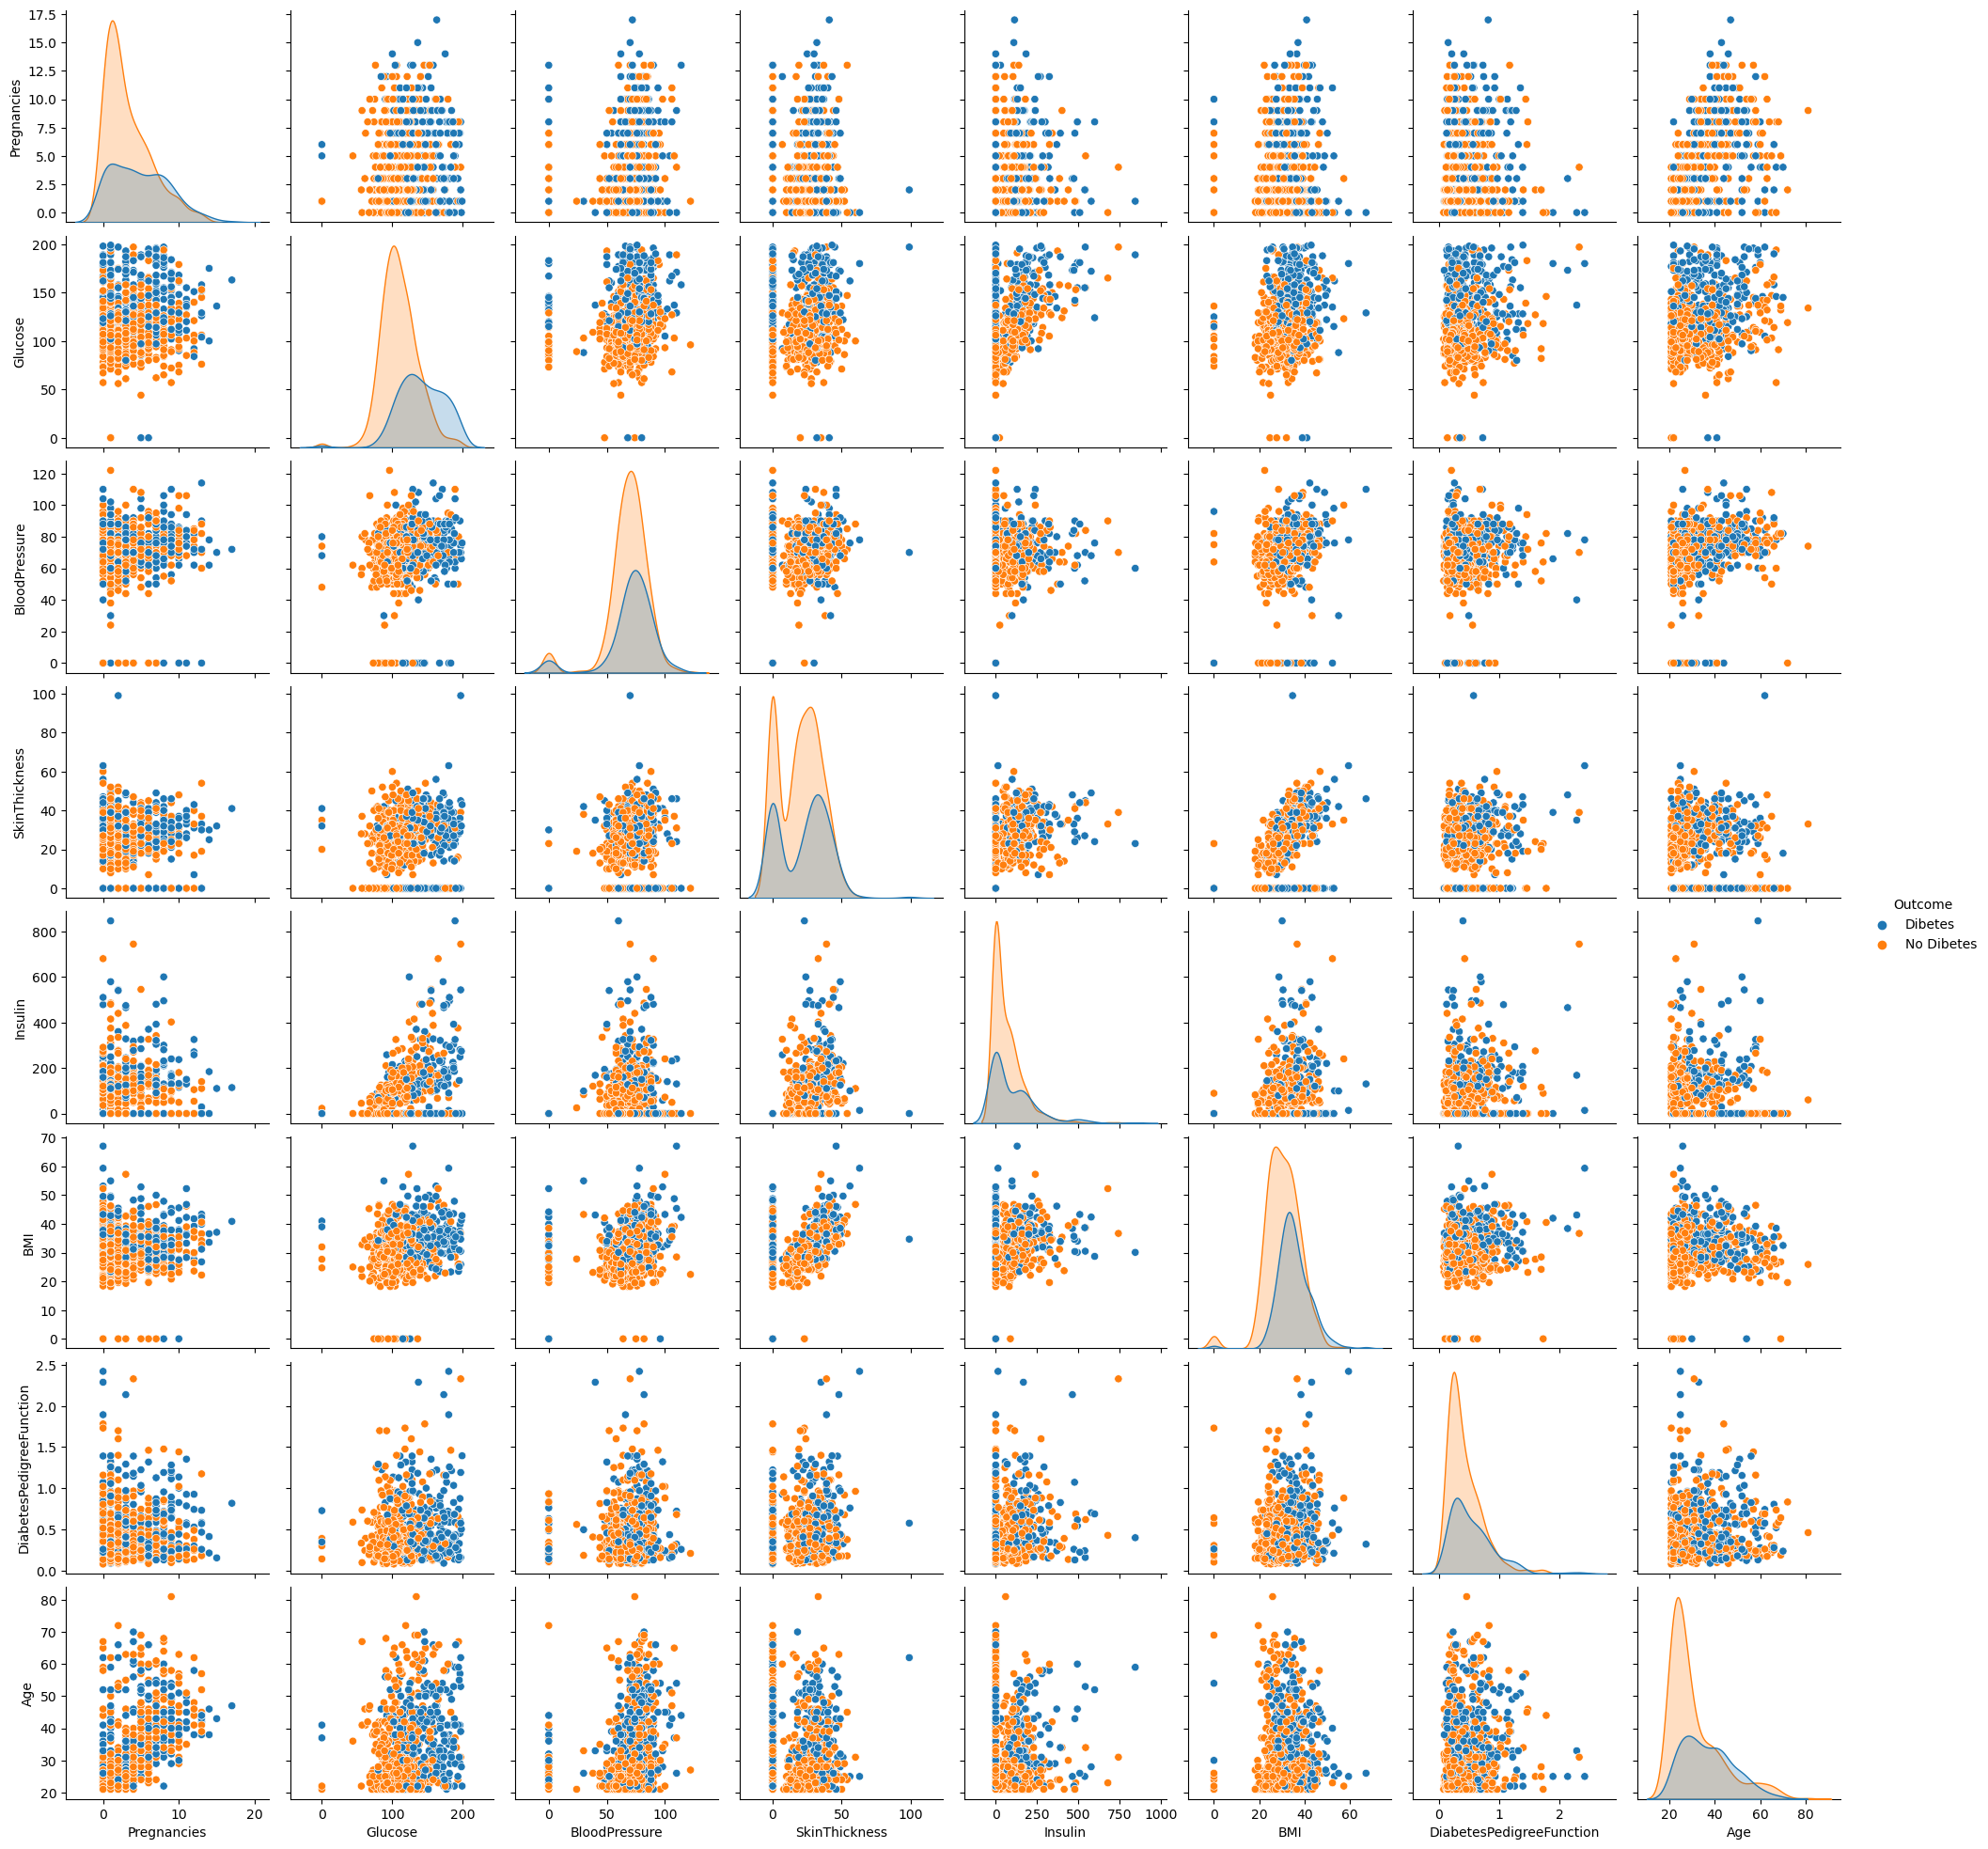

In [134]:
sns.pairplot(df,hue='Outcome')

In [135]:
#Lets again convert categorical veriable into numerical one by using Map function -
df['Outcome'] = df['Outcome'].map({'Dibetes':1,'No Dibetes':0})
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [136]:
#Lets Split the data in x & y Axis Veriables -
X=df.drop('Outcome',axis=1).values
y=df['Outcome'].values

In [137]:
#Lets split the data in train_test_split parts -
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [138]:
#Lets Convert integer values to float, because PyTorch/Tensor cannot recognize integer values -
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)
df.shape

(768, 9)

In [139]:
#Lets create an object for the algorithm -
import torch
import torch.nn as nn #Neural Network
import torch.nn.functional as F

In [140]:
#Lets create Model by using Pytorch -
class ANN_Model(nn.Module):
    def __init__(self,input_features=8,hid_lay1=20,hid_lay2=20,output_features=2):
        super().__init__()
        self.fully_connected1=nn.Linear(input_features,hid_lay1)
        self.fully_connected2=nn.Linear(hid_lay1,hid_lay2)
        self.output_layer=nn.Linear(hid_lay2,output_features)
    def forward(self,x):
        x=F.relu(self.fully_connected1(x))
        x=F.relu(self.fully_connected2(x))
        x=self.output_layer(x)
        return x

In [141]:
#Lets Initiate the ANN Model -
torch.manual_seed(20)
model=ANN_Model()
model.parameters

<bound method Module.parameters of ANN_Model(
  (fully_connected1): Linear(in_features=8, out_features=20, bias=True)
  (fully_connected2): Linear(in_features=20, out_features=20, bias=True)
  (output_layer): Linear(in_features=20, out_features=2, bias=True)
)>

In [142]:
#Lets Initiate the Backword Propagation - by defining loss function and optimizer -
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [143]:
#Lets start the eopches -
epochs=500
final_losses=[]
for i in range(epochs):
    i=i+1
    predict_y=model.forward(X_train)
    loss=loss_function(predict_y,y_train)
    final_losses.append(loss)
    if i%10 == 1:
        print("Epoch Number: {} and the loss: {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch Number: 1 and the loss: 3.4572105407714844
Epoch Number: 11 and the loss: 0.8019207715988159
Epoch Number: 21 and the loss: 0.6090320944786072
Epoch Number: 31 and the loss: 0.5917771458625793
Epoch Number: 41 and the loss: 0.5679708123207092
Epoch Number: 51 and the loss: 0.5529041886329651
Epoch Number: 61 and the loss: 0.5410094857215881
Epoch Number: 71 and the loss: 0.5310389995574951
Epoch Number: 81 and the loss: 0.5220361351966858
Epoch Number: 91 and the loss: 0.5135972499847412
Epoch Number: 101 and the loss: 0.5061254501342773
Epoch Number: 111 and the loss: 0.4983409643173218
Epoch Number: 121 and the loss: 0.49605512619018555
Epoch Number: 131 and the loss: 0.4828636944293976
Epoch Number: 141 and the loss: 0.47558996081352234
Epoch Number: 151 and the loss: 0.48198652267456055
Epoch Number: 161 and the loss: 0.48064684867858887
Epoch Number: 171 and the loss: 0.47069016098976135
Epoch Number: 181 and the loss: 0.4590848684310913
Epoch Number: 191 and the loss: 0.450

In [144]:
final_losses

[tensor(3.4572, grad_fn=<NllLossBackward0>),
 tensor(1.7547, grad_fn=<NllLossBackward0>),
 tensor(1.4100, grad_fn=<NllLossBackward0>),
 tensor(0.9452, grad_fn=<NllLossBackward0>),
 tensor(1.1574, grad_fn=<NllLossBackward0>),
 tensor(0.8916, grad_fn=<NllLossBackward0>),
 tensor(0.7284, grad_fn=<NllLossBackward0>),
 tensor(0.8200, grad_fn=<NllLossBackward0>),
 tensor(0.6773, grad_fn=<NllLossBackward0>),
 tensor(0.6956, grad_fn=<NllLossBackward0>),
 tensor(0.8019, grad_fn=<NllLossBackward0>),
 tensor(0.7154, grad_fn=<NllLossBackward0>),
 tensor(0.6445, grad_fn=<NllLossBackward0>),
 tensor(0.6794, grad_fn=<NllLossBackward0>),
 tensor(0.6694, grad_fn=<NllLossBackward0>),
 tensor(0.6191, grad_fn=<NllLossBackward0>),
 tensor(0.6354, grad_fn=<NllLossBackward0>),
 tensor(0.6668, grad_fn=<NllLossBackward0>),
 tensor(0.6472, grad_fn=<NllLossBackward0>),
 tensor(0.6049, grad_fn=<NllLossBackward0>),
 tensor(0.6090, grad_fn=<NllLossBackward0>),
 tensor(0.6296, grad_fn=<NllLossBackward0>),
 tensor(0.

In [ ]:
# Lets plot the loss function -
plt.plot(range(epochs),final_losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [145]:
#Lets Predict the results -
predictions = []
with torch.no_grad():
    for i,data in enumerate(X_test):
        predict_y=model(data)
        predictions.append(predict_y.argmax().item())
        print(predict_y.argmax().item())

1
0
0
1
0
0
1
1
1
1
1
1
0
1
0
0
1
0
1
1
1
0
0
0
0
1
0
1
0
0
1
1
1
1
0
1
1
0
1
1
0
0
0
1
1
0
0
1
1
0
1
1
1
1
1
0
0
0
1
0
1
1
0
1
1
1
1
1
0
0
0
0
0
1
1
1
0
1
0
0
1
1
0
0
0
0
1
1
1
1
0
0
1
0
1
1
1
1
1
1
0
0
0
0
1
1
0
1
0
1
0
1
1
0
1
1
0
1
0
1
1
1
1
0
1
0
0
0
0
0
1
0
0
0
0
1
1
0
1
1
0
1
0
0
1
0
0
1
0
1
0
0
0
0


In [146]:
#Lets Evaluate the model -
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[65 42]
 [ 9 38]]
0.6688311688311688


In [147]:
#Lets Save the model -
torch.save(model,'Diabetes.pt')

In [148]:
#Lets Load the model -
model=torch.load('Diabetes.pt')

In [149]:
model.eval()

ANN_Model(
  (fully_connected1): Linear(in_features=8, out_features=20, bias=True)
  (fully_connected2): Linear(in_features=20, out_features=20, bias=True)
  (output_layer): Linear(in_features=20, out_features=2, bias=True)
)

In [150]:
#Lets Predict the new data -
input_data=list(df.iloc[0,:-1])
input_data

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [151]:
new_data=torch.tensor(input_data)

In [153]:
with torch.no_grad():
    print(model(new_data))
    print(model(new_data).argmax().item())
    if model(new_data).argmax().item() == 1:
        print("Ohhh!!! You have Diabetes")
    else:
        print("Congratulations!!! You Don't have Diabetes")

tensor([0.3745, 3.0923])
1
Ohhh!!! You have Diabetes
